In [1]:
%load_ext autoreload
%autoreload 2

import bento as bt
import spatialdata as sd

In [2]:
sdata = sd.read_zarr("/mnt/d/sdata/merfish_sample.zarr/")
sdata

SpatialData object with:
├── Points
│     └── 'transcripts': DataFrame with shape: (221090, 4) (2D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (15, 1) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (15, 1) (2D shapes)
└── Table
      └── AnnData object with n_obs × n_vars = 15 × 135
    obs: 'cell_boundaries', 'region'
    uns: 'spatialdata_attrs': AnnData (15, 135)
with coordinate systems:
▸ 'global', with elements:
        transcripts (Points), cell_boundaries (Shapes), nucleus_boundaries (Shapes)

In [3]:
sdata = bt.io.prep(sdata)

bt.tl.shape_stats(sdata)

bt.pl.shape_stats(sdata)

sdata = bt.ut.filter_by_gene(sdata, threshold=10)

bt.pl.density(sdata)

genes = ["PRKCA", "CEMIP", "THBS1", "DIP2B", "TPR"]
bt.pl.points(sdata, hue="feature_name", hue_order=genes, legend=False, s=2)

In [19]:
res = 0.5
bt.tl.flux(sdata, radius=50, res=res, recompute=True)

Done. 🍱: 100%|██████████| 3/3 [00:14<00:00,  4.93s/it] 


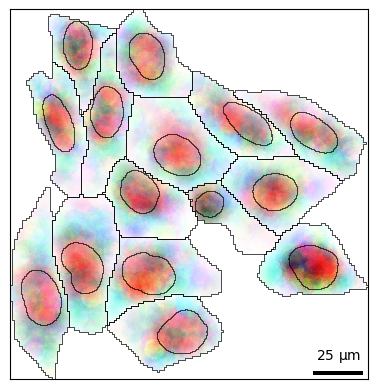

In [20]:
bt.pl.flux(sdata, res=res)

Optimizing # of clusters:   0%|          | 0/4 [00:00<?, ?it/s]

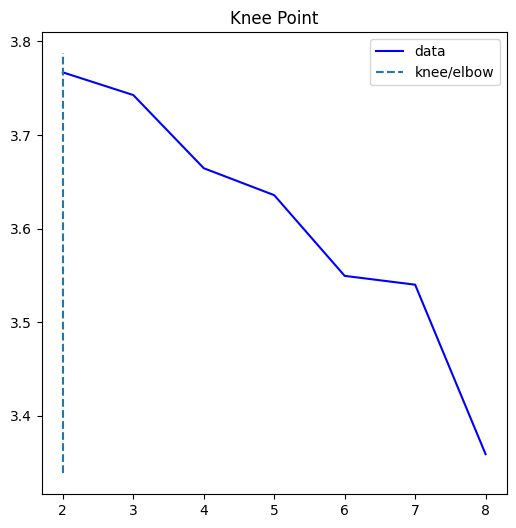

Done: 100%|██████████| 4/4 [00:06<00:00,  1.71s/it]                    


In [21]:
bt.tl.fluxmap(sdata, res=res)

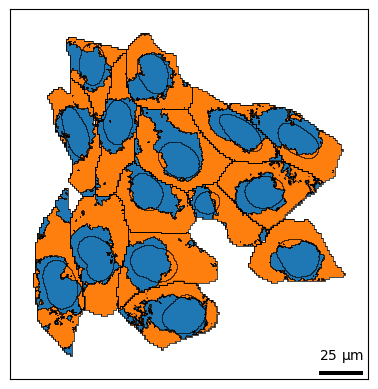

In [22]:
bt.pl.fluxmap(sdata)

In [ ]:
bt.tl.fe_fazal2019(sdata)

4 samples of mat are empty, they will be removed.
Running wsum on mat with 19323 samples and 135 targets for 8 sources.
Infering activities on 2 batches.


100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


In [ ]:
sdata

SpatialData object with:
├── Points
│     ├── 'cell_boundaries_raster': DataFrame with shape: (<Delayed>, 158) (2D points)
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 10) (2D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (15, 9) (2D shapes)
│     ├── 'fluxmap1_boundaries': GeoDataFrame shape: (15, 2) (2D shapes)
│     ├── 'fluxmap2_boundaries': GeoDataFrame shape: (15, 2) (2D shapes)
│     ├── 'fluxmap3_boundaries': GeoDataFrame shape: (15, 2) (2D shapes)
│     ├── 'fluxmap4_boundaries': GeoDataFrame shape: (15, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (15, 2) (2D shapes)
└── Table
      └── AnnData object with n_obs × n_vars = 15 × 135
    obs: 'cell_boundaries', 'region'
    uns: 'spatialdata_attrs', 'flux_variance_ratio', 'flux_counts', 'flux_genes', 'fe_stats', 'fe_ngenes': AnnData (15, 135)
with coordinate systems:
▸ 'global', with elements:
        cell_boundaries_raster (Points), transcripts (Points), cell_boundaries

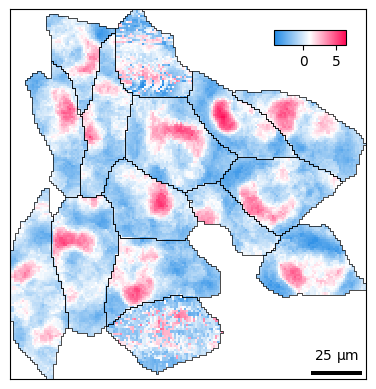

In [ ]:
bt.pl.fe(
    sdata,
    "flux_OMM",
    res=res,
    shapes=["cell_boundaries", "fluxmap2"],
    hide_outside=True,
)

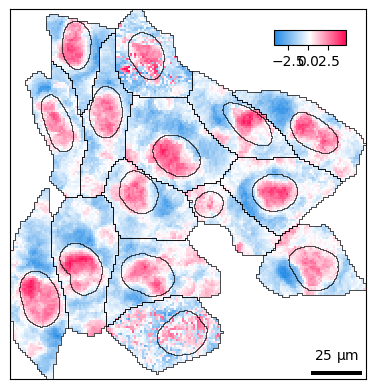

In [ ]:
bt.pl.fe(
    sdata,
    "flux_Nucleus",
    res=res,
    shapes=["cell_boundaries", "nucleus_boundaries", "fluxmap1"],
)

In [ ]:
bt.tl.lp(sdata)

Crunching shape features...
Crunching point features...
Saving results...
Done.
Crunching shape features...
Crunching point features...
Saving results...
Done.


In [ ]:
sdata

SpatialData object with:
├── Points
│     ├── 'cell_boundaries_raster': DataFrame with shape: (<Delayed>, 158) (2D points)
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 10) (2D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (15, 15) (2D shapes)
│     ├── 'fluxmap1_boundaries': GeoDataFrame shape: (15, 2) (2D shapes)
│     ├── 'fluxmap2_boundaries': GeoDataFrame shape: (15, 2) (2D shapes)
│     ├── 'fluxmap3_boundaries': GeoDataFrame shape: (15, 2) (2D shapes)
│     ├── 'fluxmap4_boundaries': GeoDataFrame shape: (15, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (15, 2) (2D shapes)
└── Table
      └── AnnData object with n_obs × n_vars = 15 × 135
    obs: 'cell_boundaries', 'region'
    uns: 'spatialdata_attrs', 'flux_variance_ratio', 'flux_counts', 'flux_genes', 'fe_stats', 'fe_ngenes', 'cell_boundaries_feature_name_features', 'lp', 'lpp': AnnData (15, 135)
with coordinate systems:
▸ 'global', with elements:
        cell_boundaries

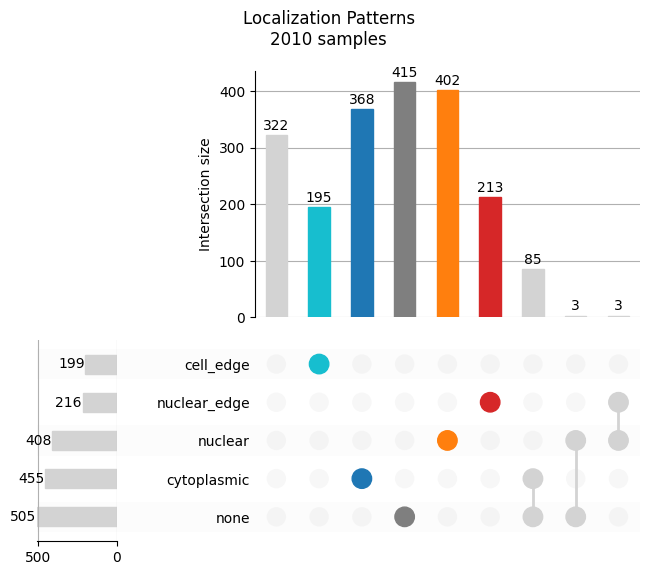

In [ ]:
bt.pl.lp_dist(sdata)

In [ ]:
bt.tl.lp_stats(sdata)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


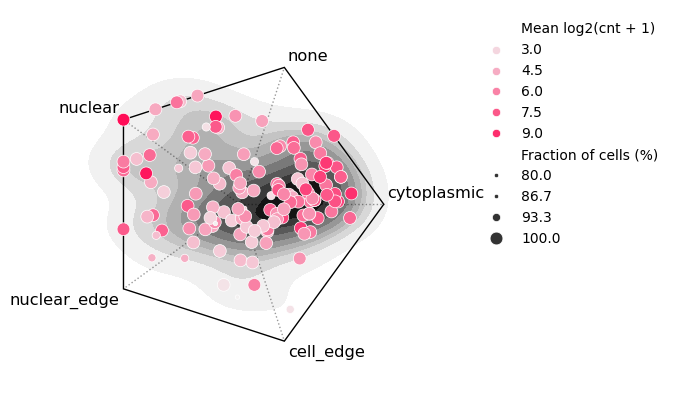

In [ ]:
bt.pl.lp_genes(sdata, sizes=(10, 85), size_norm=(90, 100))

In [ ]:
from spatialdata.models import ShapesModel
from spatialdata.transformations import get_transformation
import geopandas as gpd

cytoplasm_boundaries = gpd.GeoDataFrame(
    geometry=bt.geo.get_shape(sdata, "cell_boundaries")
    - bt.geo.get_shape(sdata, "nucleus_boundaries")
)
transformations = get_transformation(sdata.shapes["cell_boundaries"], get_all=True)
sdata.shapes["cytoplasm_boundaries"] = ShapesModel.parse(
    cytoplasm_boundaries, transformations=transformations
)
sdata = bt.io.prep(sdata, shape_keys=["cytoplasm_boundaries"])

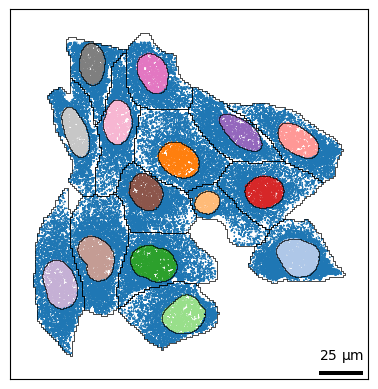

In [ ]:
bt.pl.points(sdata, hue="nucleus_boundaries", legend=False, s=1, palette="tab20")

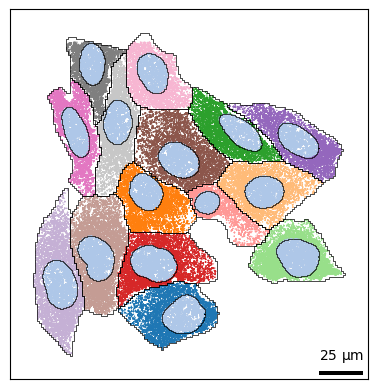

In [ ]:
bt.pl.points(sdata, hue="cytoplasm_boundaries", legend=False, s=1, palette="tab20")

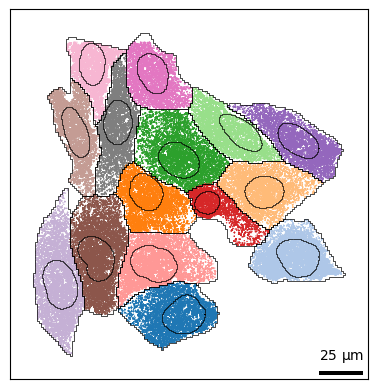

In [ ]:
bt.pl.points(sdata, hue="cell_boundaries", legend=False, s=1, palette="tab20")

In [ ]:
bt.tl.coloc_quotient(sdata, shapes=["cytoplasm_shape", "nucleus_shape"])

nucleus_shape: 100%|██████████| 15/15 [00:02<00:00,  6.63it/s]


Preparing tensor...
:running: Decomposing tensor...


Device cuda: 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]

:heavy_check_mark: Done.


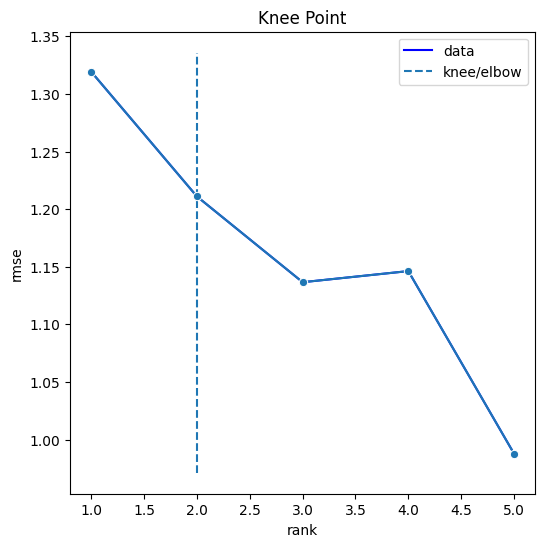

In [ ]:
bt.tl.colocation(sdata, ranks=range(1, 6))

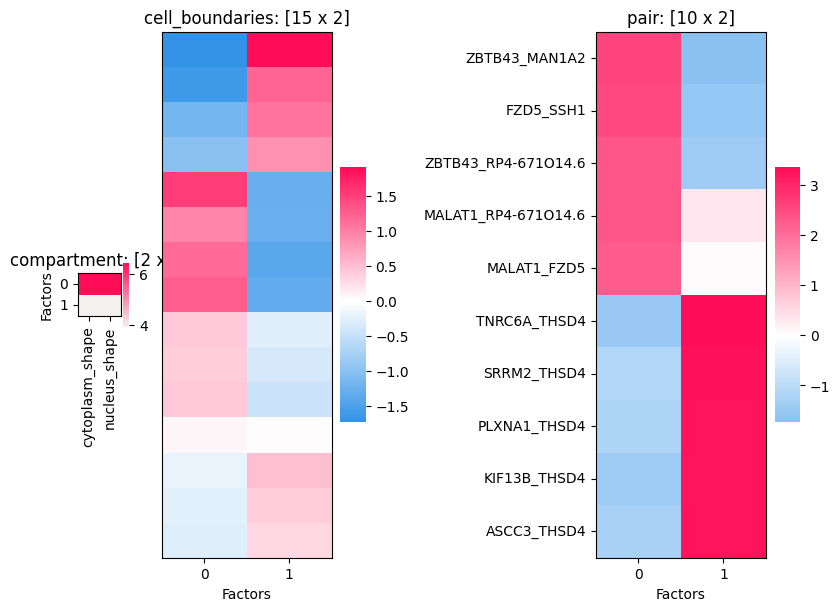

In [ ]:
bt.pl.colocation(sdata, rank=2)